In [ ]:
# My default imports for data analysis
%reset -f
%matplotlib inline
%config InlineBackend.figure_format = "retina" # High-res graphs (rendered irrelevant by svg option below)
%config InlineBackend.print_figure_kwargs = {"bbox_inches":"tight"} # No extra white space
%config InlineBackend.figure_format = "svg" # 'png' is default
import warnings
warnings.filterwarnings("ignore") # Because we are adults
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import SVG, display, Latex
from dfply import *

# ipypublish imports
# See the imported script for changes to matplotlib settings 
# Has helpful commands and settings for making the final pdf
from ipypublish.scripts.ipynb_latex_setup import *

\renewcommand{\baselinestretch}{1.5} % make PDF's line spacing a little roomier

# Introduction
This is a template for an APA-style [iPyPublish](https://github.com/chrisjsewell/ipypublish) manuscript. Feel free to check out the documentation and examples at that link; it's all very good. There you can find information on how to embed figures, code, tables, and more. References are managed using [Zotero](https://www.zotero.org/) in concert with [Better BibTex](https://github.com/retorquere/zotero-better-bibtex/). For now, you're going to want to edit the notebook's metadata in order to change what appears on the title page. In addition, the metadata includes `jupytext` configuration, so that you can automatically generate markdown and py:percent versions of this notebook automatically on saving -- assuming you have `jupytext` installed and correctly configured, that is! 

## Configuration
My working configuration files for Jupyter (with Jupytext) and iPyPublish can be found in this repository. Naturally, you will need to replace your computer's original versions of these files with the new ones included here. For example, if using Anaconda, your iPyPublish installation can be found at `your_environment_name/Lib/site-packages/ipypublish`.

- `biblio_natbib.py`, `doc_article.py`, and `front_pages.py` all live in `your_environment_name\Lib\site-packages\ipypublish\latex\ipypublish`
- `ipynb_latex_setup.py` lives in `your_environment_name\Lib\site-packages\ipypublish\scripts`
- `latex_ipypublish_main.py` lives in `your_environment_name\Lib\site-packages\ipypublish\export_plugins`

## Caveats
Since the creation of this template, `ipypublish` has been upgraded to version 0.9.0. This template was designed to work with version 0.6.7, and suits my needs; as such, it may take some time before I update this guide to deal with the latest version — if any changes are even needed at all, since I haven't had a chance to try out the latest edition.

# Notes

## Production
Produce a notebook in the terminal with the command `nbpublish -pdf -pbug file_name.ipynb` [^1]. Outputs to `converted` folder at the `.ipynb` file's location.[^2]

[^1]: \hphantom{} Technically `-pbug` is optional so you can see verbose output, but nbpublish seems to work more reliably with this option enabled.  
[^2]: \hphantom{} `nbpublish` requires a lot of different technologies to work together. As such, if a build fails, simply try running the same command once more to see if that fixes the issue before moving on to more intense debugging.

## Markdown
- Headings and sub-headings (and so on) are made by prefacing text with `#`. The more `#`s, the greater the level of heading.
- Unordered lists are made by prefacing text with a "-".
    1. Numbered lists start with a number and dot.
    2. Create sublists via tabbed indentation.
- Footnote links are made with `[^X]` (where `X` is some number). Footnote content is placed below with `[^X]: Content goes here`. Here's an example.[^2] 
    - Correct formatting only appears after running `nbpublish`.
- [Links](https://google.com) can be generated with the following syntax: `[link](http://www.website.com)`
- `Code` can be placed between backticks (the character to the left of the `1` key at the top of your keyboard).
    - Place it between 3 backticks (with an optional language name) and you get (syntax-highlighted) block code.[^3]
    ```python
    print(foo)```
- *Italic*, __bold__, and ***bolded italic*** text can be created by sandwiching text between 1, 2, or 3 `*`s or `_`s respectively.
- > Blockquotes are made by prefacing text with `>` .

\todo[inline]{Get inline todos with Latex's "todo" command.}

[^2]: \hphantom{} Footnote content goes here!  
[^3]: \hphantom{} Note, however, that one should not use this for displaying large chunks of code in an nbpublish PDF. Instead, see code cell \cref{code:publish} below for an example of how to place code in the PDF

## Citations and References
- First, specify the `bibliography` entry in the notebook metadata to the correct bibliography file (Edit --> Edit Notebook Metadata). _Leave out the `.bib` extension from this file name!_ It should look like `path/to/bibFileName` .
    - If nbpublish is having problems finding the `.bib` file, I have had success by placing a copy in the `converted/notebook_name_files/` directory, as well as placing the file in the same folder as the actual notebook. This makes set up for the notebook's bibliography metadata especially easy.
- Citations can be input with citation keys and standard latex commands (e.g., `\cite{citationKey}`).
- I've had success with citation keys generated via Zotero Better BibTex, like so \citep{uddenbergTelefaceSerialReproduction2018}. Note that you won't see the final formatted output until you run `nbpublish`.
- See a [cheat sheet of valid cite commands here](http://merkel.texture.rocks/Latex/natbib.php).

## Figures
- Figures can be displayed with commands like `display(SVG("filename.svg"))` or `Image('filename.jpg', height=400)`.
- Edit the cell's metadata to change the figure caption, placement, size, et al. (View --> Cell Toolbar --> Edit Metadata --> Click on "Edit Metadata" above cell.)
- Figures can be referenced via `\cref{fig:figNameFromMetadata}`. For example: \cref{fig:example}
- Here's the metadata for the figure below, so you don't have to inspect it yourself — but be wary that multiply nested curly braces don't show up correctly in the PDF output:
```json
{
	"ipub": {
		"figure": {
			"caption": "An example beeswarm plot of the built-in `tips` dataset found in seaborn.",
			"height": 0.3,
			"label": "fig:example",
			"placement": "H",
			"widefigure": false
		}
	}
}
```

### Pre-made SVG

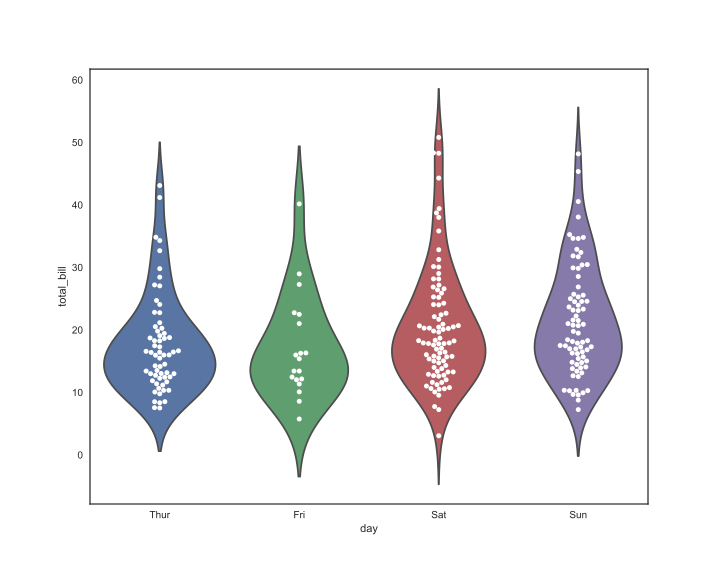

In [9]:
display(SVG("figures/example.svg"))

### Inline plots (made with code)

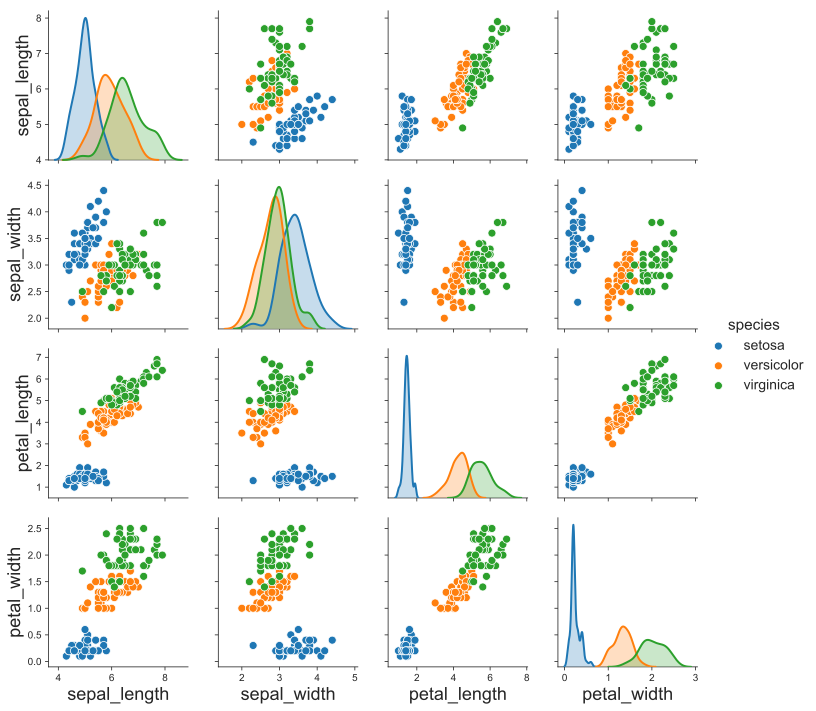

In [12]:
sns.set_style("ticks")
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species', height=2.5);

## Displaying Code

Displaying the code in a code block, as in \cref{code:example_list_comp} can be accomplished by editing the metadata:

```json
{
"ipub": {
  "code": {
  "format" : {},
    "asfloat": true,
    "caption": "Example list comprehension.",
    "label": "code:example_list_comp",
    "widefigure": false,
    "placement": "H"
    }
  }
}
```

In [ ]:
colors = ["red", "green", "blue"]
for color in colors:
    print(color)

## Templating — Pass Variables into Markdown
- Using the [Python Markdown Extension](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/python-markdown/readme.html), you can pipe valid Python code into markdown cells directly by sandwiching it between two curly braces: E.g., 2 + 2 = {{str(2 + 2)}}
- Note that the notebook needs to be `Trusted`; look to the top right to see if it is and simply click on `Not Trusted` to change that.

## Latex
- Execute arbitrary latex by sandwiching it between dollar signs: $a = b+c$
- Alternatively, use `Latex()` command from `ipypublish` within a code cell.
- Latex's `hphantom` command is useful when you just want a little more horizontal space between items.

## Terminal commands
- Execute terminal commands in Jupyter by prefacing code with `!` .
- For example, you can export this notebook with the following code cell (uncommented, of course):

In [ ]:
# !nbpublish -pdf -pbug template.ipynb

## Troubleshooting

### Jupytext
- If saving to `Rmd` format, beware using single quotes within figure caption metadata, since R Markdown uses single quotes for metadata and not double quotes, which creates issues when you want to include apostrophes.
- If you are encountering problems opening or even "trusting" a notebook that was previously working fine, simply delete the other non-ipynb representations of the notebook. I encounter this issue most often when synchronizing notebook files via Dropbox.